<a href="https://colab.research.google.com/github/ChristianAries/Tugas-SIC/blob/main/202304560002_ChristianAriesPratama_ProjectSIC_Bank_Central_Asia_Stock_Historical_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas Sistem Informasi Cerdas : Prediksi harga saham

Informasi dataset


*   Sumber :https://www.kaggle.com/datasets/caesarmario/bank-central-asia-stock-historical-price
*   Konteks : Dataset ini diambil dari situs web Yahoo Finance. Dataset ini berissi tentang harga saham historis PT Bank Central Asia Tbk.


*   Tujuan : Mampu memprediksi harga saham







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset dari file CSV
df = pd.read_csv('sample_data/BBCA.JK.csv')

# Menampilkan beberapa baris pertama untuk melihat data
print("Lima baris pertama dataset:")
print(df.head())

# Menampilkan informasi dasar tentang dataset
print("\nInformasi dataset:")
df.info()

Lima baris pertama dataset:
                                     Date;Open;High;Low;Close;Adj Close;Volume
01/01/2019;52000;52000;52000;52000;4                                  61E+14;0
02/01/2019;52000;52450;52000;52400;4                           64E+14;35956000
03/01/2019;52000;52200;51150;51800;4                           59E+12;72358000
04/01/2019;51750;52050;51250;52050;4                           61E+13;51465000
07/01/2019;52650;53250;52450;52450;4                           65E+13;73438000

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 1499 entries, 01/01/2019;52000;52000;52000;52000;4 to 17/02/2025;89750;93250;89750;93250;93250;89096400
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Date;Open;High;Low;Close;Adj Close;Volume  1321 non-null   object
dtypes: object(1)
memory usage: 23.4+ KB


In [ ]:
# Menampilkan ukuran dataset (jumlah baris dan kolom)
print("\nUkuran dataset (baris, kolom):", df.shape)

# Menampilkan nama-nama kolom
print("\nNama-nama kolom:", df.columns)

# Menampilkan tipe data setiap kolom
print("\nTipe data setiap kolom:")
print(df.dtypes)


Ukuran dataset (baris, kolom): (1499, 1)

Nama-nama kolom: Index(['Date;Open;High;Low;Close;Adj Close;Volume'], dtype='object')

Tipe data setiap kolom:
Date;Open;High;Low;Close;Adj Close;Volume    object
dtype: object


In [ ]:
# Menampilkan statistik deskriptif untuk kolom numerik
print("\nStatistik deskriptif untuk kolom numerik:")
print(df.describe())

# Menampilkan statistik deskriptif untuk kolom kategorikal
print("\nStatistik deskriptif untuk kolom kategorikal:")
print(df.describe(include=['object']))


Statistik deskriptif untuk kolom numerik:
       Date;Open;High;Low;Close;Adj Close;Volume
count                                       1321
unique                                      1315
top                                     20E+11;0
freq                                           5

Statistik deskriptif untuk kolom kategorikal:
       Date;Open;High;Low;Close;Adj Close;Volume
count                                       1321
unique                                      1315
top                                     20E+11;0
freq                                           5


In [ ]:
# Memeriksa nilai yang hilang
print("\nJumlah nilai yang hilang per kolom:")
print(df.isnull().sum())

# Menampilkan persentase nilai yang hilang (jika ada)
print("\nPersentase nilai yang hilang per kolom:")
print(df.isnull().sum() / len(df) * 100)
print(df.dtypes)
print(df.head())


Jumlah nilai yang hilang per kolom:
Date;Open;High;Low;Close;Adj Close;Volume    178
dtype: int64

Persentase nilai yang hilang per kolom:
Date;Open;High;Low;Close;Adj Close;Volume    11.874583
dtype: float64
Date;Open;High;Low;Close;Adj Close;Volume    object
dtype: object
                                     Date;Open;High;Low;Close;Adj Close;Volume
01/01/2019;52000;52000;52000;52000;4                                  61E+14;0
02/01/2019;52000;52450;52000;52400;4                           64E+14;35956000
03/01/2019;52000;52200;51150;51800;4                           59E+12;72358000
04/01/2019;51750;52050;51250;52050;4                           61E+13;51465000
07/01/2019;52650;53250;52450;52450;4                           65E+13;73438000


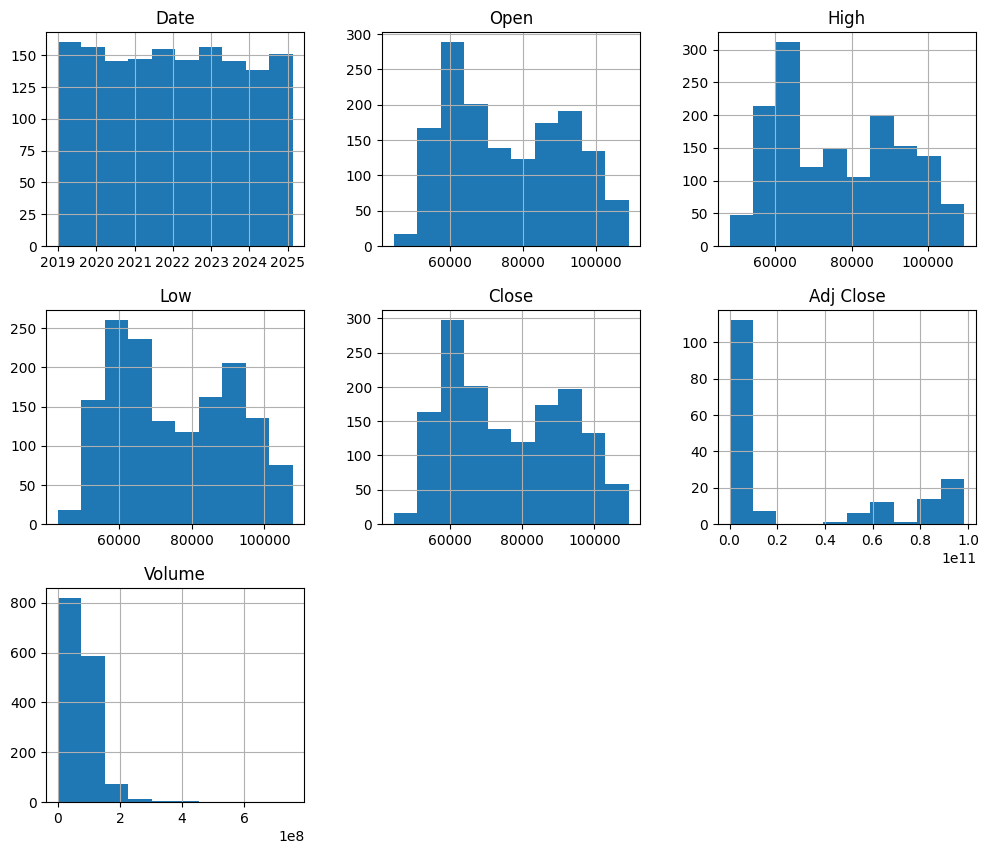

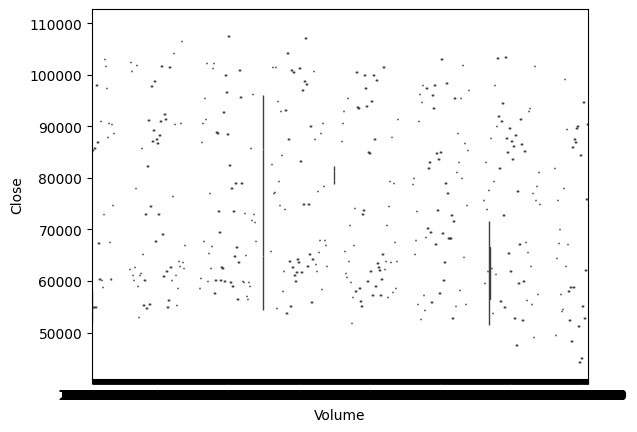

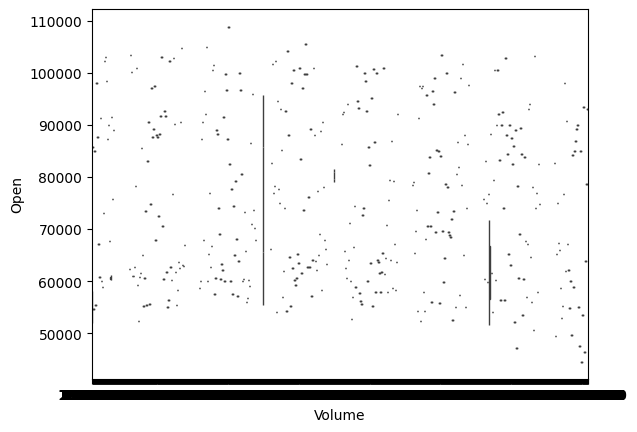

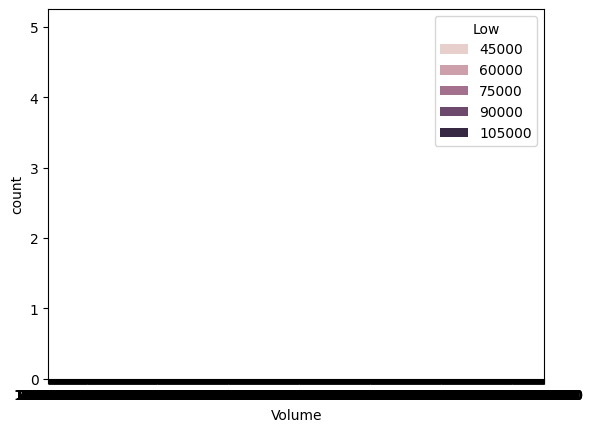

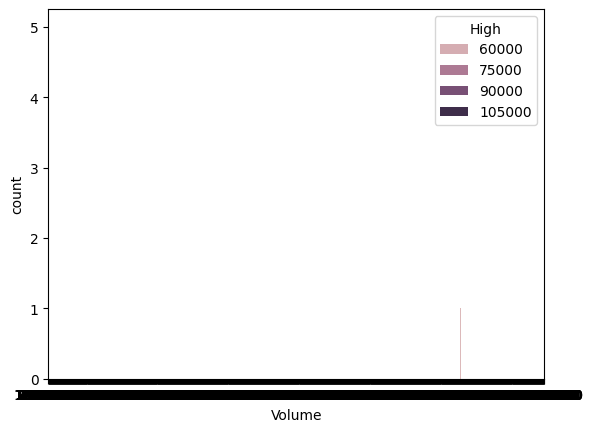

In [ ]:
# Pisahkan kolom-kolom jika masih 1 kolom gabungan
df = pd.read_csv('sample_data/BBCA.JK.csv', delimiter=';')

# Konversi kolom tanggal dan numerik
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')  # Sesuaikan format jika perlu
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
# Visualisasi distribusi variabel numerik
df.hist(figsize=(12, 10))
plt.show()

# Visualisasi distribusi variabel kategorikal
for column in df.select_dtypes(include=['object']).columns:
    sns.countplot(x=column, data=df)
    plt.xticks(rotation=45, ha="right")
    plt.show()

# Visualisasi hubungan antara variabel numerik dan target
sns.boxplot(x='Volume', y='Close', data=df)
plt.show()

sns.boxplot(x='Volume', y='Open', data=df)
plt.show()

# Visualisasi hubungan antara variabel kategorikal dan target
sns.countplot(x='Volume', hue='Low', data=df)
plt.show()

sns.countplot(x='Volume', hue='High', data=df)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('sample_data/BBCA.JK.csv', delimiter=';')

df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

df['Return'] = df['Close'].pct_change()
df['Target'] = np.where(df['Return'].shift(-1) > 0, 1, 0)
df.dropna(inplace=True)

features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
X = df[features]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

latest_data = X.iloc[[-1]]
latest_data_scaled = scaler.transform(latest_data)

proba = model.predict_proba(latest_data_scaled)[0]
print(f"Probabilitas Turun: {proba[0]*100:.2f}%")
print(f"Probabilitas Naik : {proba[1]*100:.2f}%")

pred = model.predict(latest_data_scaled)[0]
print("Prediksi: Naik" if pred == 1 else "Prediksi: Turun")

print("\nAkurasi Model:", accuracy_score(y_test, model.predict(X_test_scaled)))
print(confusion_matrix(y_test, model.predict(X_test_scaled)))
print(classification_report(y_test, model.predict(X_test_scaled)))

Probabilitas Turun: 58.00%
Probabilitas Naik : 42.00%
Prediksi: Turun

Akurasi Model: 0.6111111111111112
[[15  9]
 [ 5  7]]
              precision    recall  f1-score   support

           0       0.75      0.62      0.68        24
           1       0.44      0.58      0.50        12

    accuracy                           0.61        36
   macro avg       0.59      0.60      0.59        36
weighted avg       0.65      0.61      0.62        36

